In [2]:
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [10]:
train_set = tf.keras.preprocessing.image_dataset_from_directory(
    "C:\\Users\\muhammad\\Downloads\\Dataset",
    labels='inferred',
    label_mode='int',
    class_names=['face', 'non-face'],
    color_mode='rgb',
    batch_size=64,
    image_size=(250, 250),
    shuffle=True,
    seed=777,
    validation_split=0.1,
    subset='training',
)

dev_set = tf.keras.preprocessing.image_dataset_from_directory(
    "C:\\Users\\muhammad\\Downloads\\Dataset",
    labels='inferred',
    label_mode='int',
    class_names=['face', 'non-face'],
    color_mode='rgb',
    batch_size=64,
    image_size=(250, 250),
    shuffle=True,
    seed=777,
    validation_split=0.1,
    subset='validation',
)

Found 10000 files belonging to 2 classes.
Using 9000 files for training.
Found 10000 files belonging to 2 classes.
Using 1000 files for validation.


In [16]:
train_set.element_spec

(TensorSpec(shape=(None, 250, 250, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None,), dtype=tf.int32, name=None))

In [17]:
dev_set.element_spec

(TensorSpec(shape=(None, 250, 250, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None,), dtype=tf.int32, name=None))

non-face tf.Tensor(1, shape=(), dtype=int32)


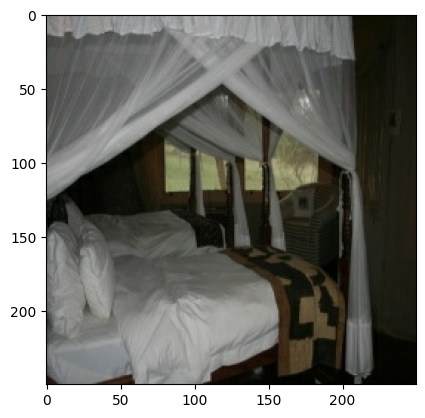

In [40]:
for images, labels in train_set.take(1):
    i = 56
    class_name = train_set.class_names[labels[i]]
    print(class_name, labels[i])
    plt.imshow(images[i].numpy().astype('uint8'))


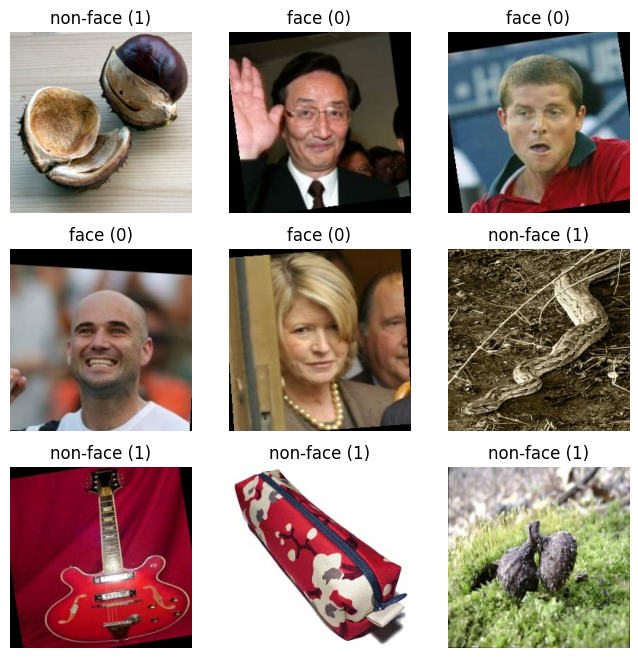

In [50]:
plt.figure(figsize=(8, 8))

for images, labels in train_set.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        title = f"{train_set.class_names[labels[i]]} ({labels[i]})"
        plt.title(title)
        plt.axis("off")

plt.show()

In [ ]:
def conv_block(x, filters, kernel_size, padding='valid'):
    x = tf.keras.layers.Conv2D(filters= filters, kernel_size= kernel_size, padding= padding)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.MaxPool2D(pool_size=2, strides=2)(x)
    return x

In [83]:
def Model():
    inputs = tf.keras.Input(shape=(250, 250, 3))
    x = tf.keras.layers.Rescaling(1./255)(inputs)

    x = conv_block(x, filters= 16, kernel_size= 3, padding= 'same')
    x = conv_block(x, filters= 32, kernel_size= 3)
    x = conv_block(x, filters= 64, kernel_size= 3)
    x = conv_block(x, filters= 64, kernel_size= 3)
    
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    x = tf.keras.layers.Dense(units= 8, activation='relu')(x)
    x = tf.keras.layers.Dense(units= 1, activation= 'linear')(x)

    outputs = x

    model = tf.keras.Model(inputs= inputs, outputs= outputs)

    return model

In [84]:
model = Model()
model.summary()

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)     │ (None, 250, 250, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_12 (Rescaling)        │ (None, 250, 250, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 250, 250, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_48          │ (None, 250, 250, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_48 (Activation)      │ (None, 250, 250, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_48 (MaxPooling2D) │ (None, 125, 125, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 123, 123, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_49          │ (None, 123, 123, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_49 (Activation)      │ (None, 123, 123, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_49 (MaxPooling2D) │ (None, 61, 61, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 59, 59, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_50          │ (None, 59, 59, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_50 (Activation)      │ (None, 59, 59, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_50 (MaxPooling2D) │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 27, 27, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_51          │ (None, 27, 27, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_51 (Activation)      │ (None, 27, 27, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_51 (MaxPooling2D) │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 8)              │        86,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 147,761 (577.19 KB)

 Trainable params: 147,409 (575.82 KB)

 Non-trainable params: 352 (1.38 KB)

In [85]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate= 0.0001),
            loss= tf.keras.losses.BinaryCrossentropy(from_logits= True),
            metrics= ['accuracy']
)

In [86]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    train_set,     
    validation_data= dev_set,
    epochs=50,
    callbacks=[callback]
)

Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 230s 2s/step - accuracy: 0.9088 - loss: 0.1865 - val_accuracy: 0.6530 - val_loss: 0.4762
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 273s 2s/step - accuracy: 0.9870 - loss: 0.0346 - val_accuracy: 0.8750 - val_loss: 0.2246
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 306s 2s/step - accuracy: 0.9931 - loss: 0.0169 - val_accuracy: 0.9710 - val_loss: 0.0637
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 280s 2s/step - accuracy: 0.9964 - loss: 0.0108 - val_accuracy: 0.9930 - val_loss: 0.0174
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 261s 2s/step - accuracy: 0.9983 - loss: 0.0064 - val_accuracy: 0.9920 - val_loss: 0.0108
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 330s 2s/step - accuracy: 0.9978 - loss: 0.0065 - val_accuracy: 0.9960 - val_loss: 0.0117
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 184s 1s/step - accuracy: 0.9988 - loss: 0.0048 - val_accuracy: 0.9980 - val_loss: 0.0046
Epoch 8/50
 32/141 ━━━━━━━━━━━━━━━━━━━━ 4:18 2s/step - accuracy: 0.9992 - loss: 0.0036

KeyboardInterrupt: 

In [105]:
loss, accuracy = model.evaluate(dev_set)

print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy*100:.2f}%")

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 147ms/step - accuracy: 0.9990 - loss: 0.0043
Validation Loss: 0.00427676597610116
Validation Accuracy: 99.90%


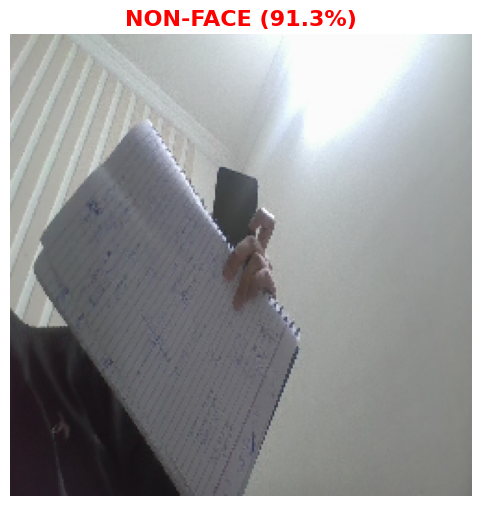

In [106]:
def plot_prediction(image_path):
    # 1. Load and process image (Same as before)
    img = tf.keras.utils.load_img(image_path, target_size=(250, 250))
    img_array = tf.keras.utils.img_to_array(img)
    img_array /= 255.0
    input_arr = np.expand_dims(img_array, axis=0)

    # 2. Get prediction
    prediction = model.predict(input_arr, verbose=0)
    probability = tf.nn.sigmoid(prediction).numpy()[0][0]

    # 3. Determine Label and Color
    if probability < 0.5:
        label = f"FACE ({100*(1-probability):.1f}%)"
        color = 'green'
    else:
        label = f"NON-FACE ({100*probability:.1f}%)"
        color = 'red'

    # 4. Plot the image
    plt.figure(figsize=(6, 6))
    plt.imshow(img)  # Display the image
    plt.title(label, fontsize=16, color=color, fontweight='bold')
    plt.axis('off')  # Hide the X and Y axis numbers
    plt.show()

# Run it!
plot_prediction('face.jpg')

In [107]:
model.save_weights("face_classifier.weights.h5")

In [109]:
model.save("FaceClassifier.keras")